## 1.5 Text Mining - 20th Century

In [53]:
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import string
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\north\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\north\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\north\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### 1. Tokenization

In [5]:
# Load the text file
file_path = r"C:\Users\north\OneDrive\Dokumente\Career Foundry\Data Visualization 1\20th-Century\key_events_20th_century.txt"
with open(file_path, 'r', encoding='utf-8') as file:
    text_data = file.read()

In [9]:
# Word tokenization
from nltk.tokenize import word_tokenize

In [11]:
# Preprocess the text
text_lower = text_data.lower()  # Convert text to lowercase

# Tokenize the text
tokens = word_tokenize(text_lower)

In [24]:
print (text_lower)

the 
20th century
 changed the world in unprecedented ways. the 
world wars
 sparked tension between countries and led to the creation of 
atomic bombs
, the 
cold war
 led to the 
space race
 and the creation of space-based rockets, and the 
world wide web
 was created. these advancements have played a significant role in citizens' lives and shaped the 
21st century
 into what it is today.





historic events in the 20th century
[
edit
]


world at the beginning of the century
[
edit
]


main article: 
edwardian era


the new beginning of the 20th century marked significant changes. the 1900s saw the decade herald a series of inventions, including the 
automobile
, 
airplane
 and 
radio broadcasting
. 1914 saw the completion of the 
panama canal
.

from 1914 to 1918, the first world war, and its aftermath, caused major changes in the power balance of the world, destroying or transforming some of the most powerful empires.



"the war to end all wars": world war i (1914–1918)
[
edit
]

In [32]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokens)
print(dist_words)

<FreqDist with 4206 samples and 21331 outcomes>


In [34]:
dist_words.most_common(10)

[('.', 1537),
 ('the', 1400),
 (',', 958),
 ('of', 597),
 ('and', 401),
 ("''", 393),
 ('in', 322),
 ('to', 322),
 ('[', 302),
 (']', 302)]

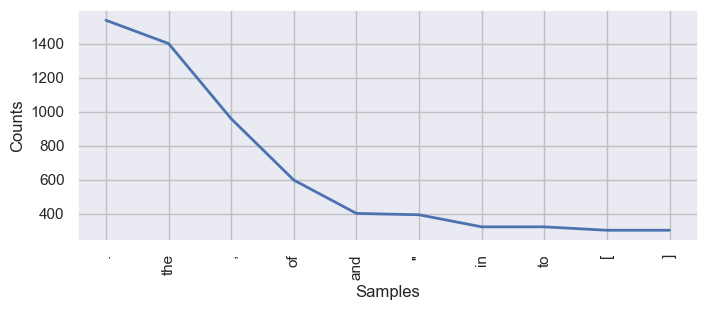

<Figure size 640x480 with 0 Axes>

In [139]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.savefig("Most Common words.png")
plt.show()

In [55]:
# Defining stopwords
from nltk.corpus import stopwords
# Define stop words and punctuation
stop_words = set(stopwords.words('english'))
tokens_cleaned = [word for word in tokens if word not in stop_words and word not in string.punctuation]

In [65]:
# Count frequencies for cleaned tokens
word_counts_cleaned = Counter(tokens_cleaned)
word_counts_cleaned.most_common(10)

[("''", 393),
 ('2018', 242),
 ('december', 222),
 ('retrieved', 205),
 ('war', 199),
 ('``', 155),
 ('world', 109),
 ("'s", 71),
 ('history', 68),
 ('soviet', 56)]

In [67]:
# Further cleaning of tokens
tokens_cleaned = [
    word for word in tokens 
    if word not in stop_words 
    and word not in string.punctuation
    and word not in ['``', "''", "'s", 'retrieved']  # Remove common artifacts
]

# Count frequencies for cleaned tokens
word_counts_cleaned = Counter(tokens_cleaned)
word_counts_cleaned.most_common(10)


[('2018', 242),
 ('december', 222),
 ('war', 199),
 ('world', 109),
 ('history', 68),
 ('soviet', 56),
 ('new', 53),
 ('20', 53),
 ('hitler', 51),
 ('first', 50)]

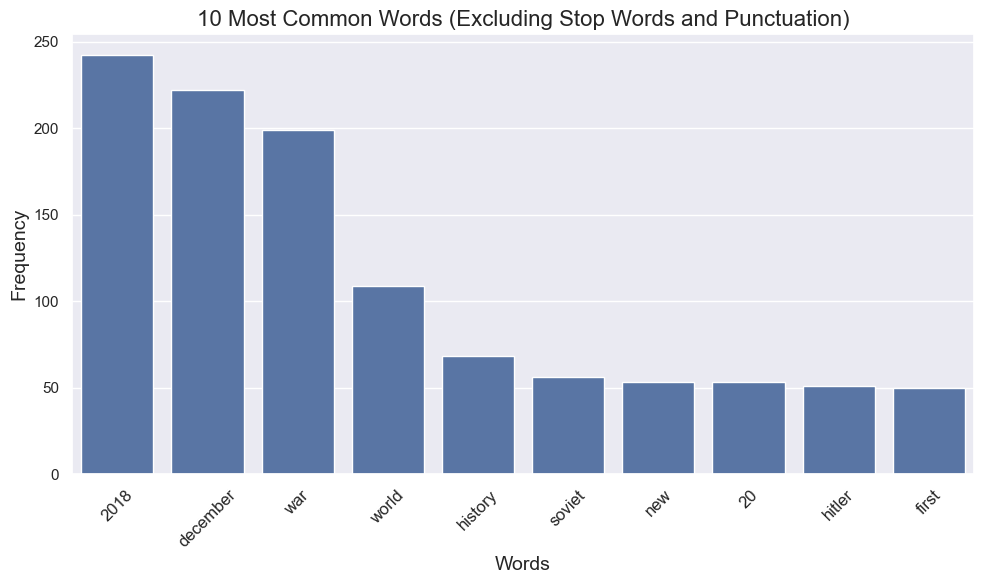

In [137]:
# Extract the 10 most common words and their counts
common_words = word_counts_cleaned.most_common(10)
words, counts = zip(*common_words)  # Unpack into two lists

# Plot using Seaborn and Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts))
plt.title("10 Most Common Words (Excluding Stop Words and Punctuation)", fontsize=16)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.savefig("10_most_common_words.png")
plt.show()


### Observations Before and After Cleaning

#### Before Cleaning
- The chart was dominated by very common words like "the," "of," "and," and punctuation marks.
- These words are generic and don't help in understanding the actual topic of the text.

#### After Cleaning
- Once stop words and punctuation were removed, the most frequent words were more meaningful, like "war," "world," "history," and "soviet."
- These words clearly relate to the themes and events discussed in the text, making the results much more relevant and useful.

#### Key Takeaway
- Cleaning the data by removing stop words and punctuation made the analysis more focused.
- This process helped highlight important words that describe the main ideas in the text.


### 2. Tags list using TextBlob

In [109]:
# Create a TextBlob object from the text data
blob = TextBlob(text_data)

# Extract part-of-speech (POS) tags
tags = blob.tags  # List of tuples (word, POS tag)

# Count the frequency of each POS tag
pos_counts = Counter(tag for word, tag in tags)

# Get the top 10 POS tags
top_10_pos = pos_counts.most_common(10)
print("Top 10 POS tags:", top_10_pos)

Top 10 POS tags: [('NNP', 4044), ('NN', 2116), ('IN', 1811), ('DT', 1760), ('CD', 1655), ('JJ', 1261), ('NNS', 793), ('VBD', 779), ('RB', 609), ('VBN', 511)]


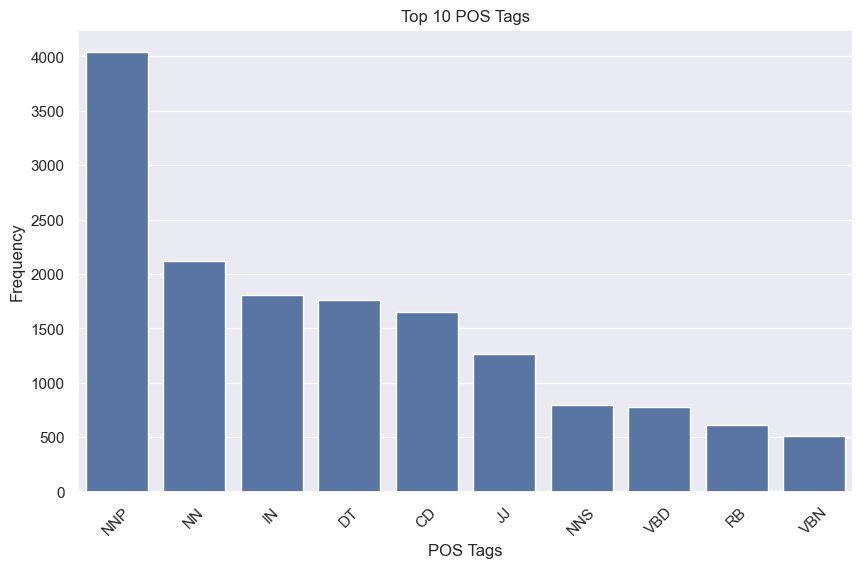

In [135]:
# Convert the top 10 POS tags into two lists for plotting
pos_labels, pos_frequencies = zip(*top_10_pos)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(pos_labels), y=list(pos_frequencies))
plt.title("Top 10 POS Tags")
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.savefig("Top_10_POStags.png")
plt.show()


In [141]:
# Separate tags into nouns, verbs, and adjectives
nouns = [word for word, pos in tags if pos.startswith('NN')]  # Nouns start with 'NN'
verbs = [word for word, pos in tags if pos.startswith('VB')]  # Verbs start with 'VB'
adjectives = [word for word, pos in tags if pos.startswith('JJ')]  # Adjectives start with 'JJ'

# Filter nouns, verbs, and adjectives to include only alphabetic tokens
nouns = [word for word, pos in tags if pos.startswith('NN') and word.isalpha()]
verbs = [word for word, pos in tags if pos.startswith('VB') and word.isalpha()]
adjectives = [word for word, pos in tags if pos.startswith('JJ') and word.isalpha()]

# Normalize words to lowercase to avoid duplicates
nouns = [word.lower() for word, pos in tags if pos.startswith('NN') and word.isalpha()]
verbs = [word.lower() for word, pos in tags if pos.startswith('VB') and word.isalpha()]
adjectives = [word.lower() for word, pos in tags if pos.startswith('JJ') and word.isalpha()]

# Count the top 15 POS labels for each category
noun_counts = Counter(nouns).most_common(15)
verb_counts = Counter(verbs).most_common(15)
adjective_counts = Counter(adjectives).most_common(15)

In [143]:
# Print the results
print("Top 15 Nouns:", noun_counts)
print("\nTop 15 Verbs:", verb_counts)
print("\nTop 15 Adjectives:", adjective_counts)

Top 15 Nouns: [('december', 222), ('war', 199), ('world', 109), ('history', 68), ('hitler', 51), ('germany', 43), ('century', 40), ('battle', 39), ('isbn', 39), ('soviet', 35), ('edit', 33), ('states', 33), ('japan', 33), ('germans', 32), ('union', 32)]

Top 15 Verbs: [('retrieved', 205), ('was', 139), ('were', 63), ('had', 44), ('became', 27), ('be', 26), ('led', 15), ('been', 15), ('is', 14), ('known', 14), ('have', 13), ('used', 13), ('did', 13), ('made', 13), ('began', 13)]

Top 15 Adjectives: [('first', 34), ('german', 29), ('nuclear', 28), ('many', 25), ('japanese', 25), ('new', 22), ('soviet', 21), ('other', 20), ('british', 18), ('second', 17), ('american', 16), ('such', 16), ('military', 13), ('early', 13), ('economic', 12)]


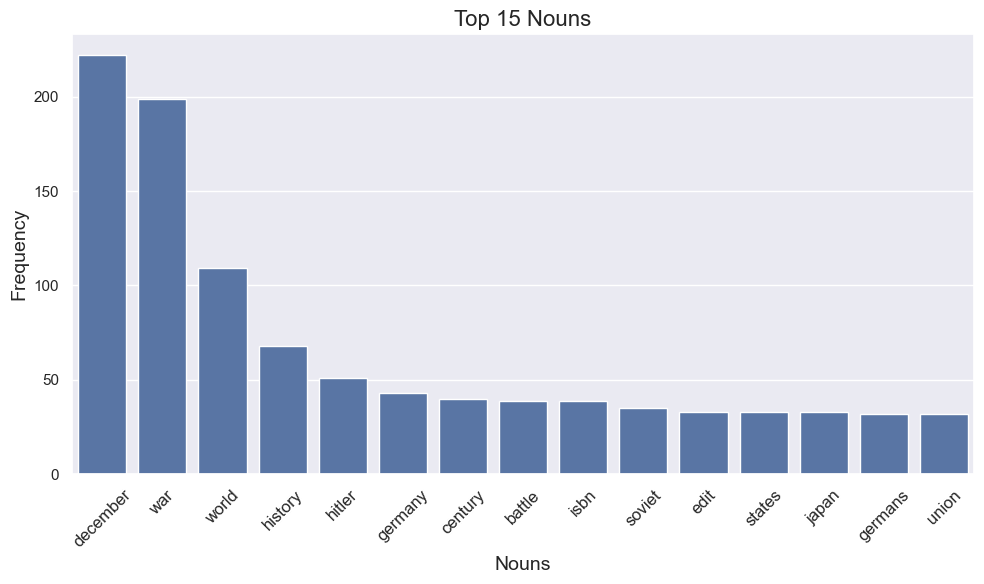

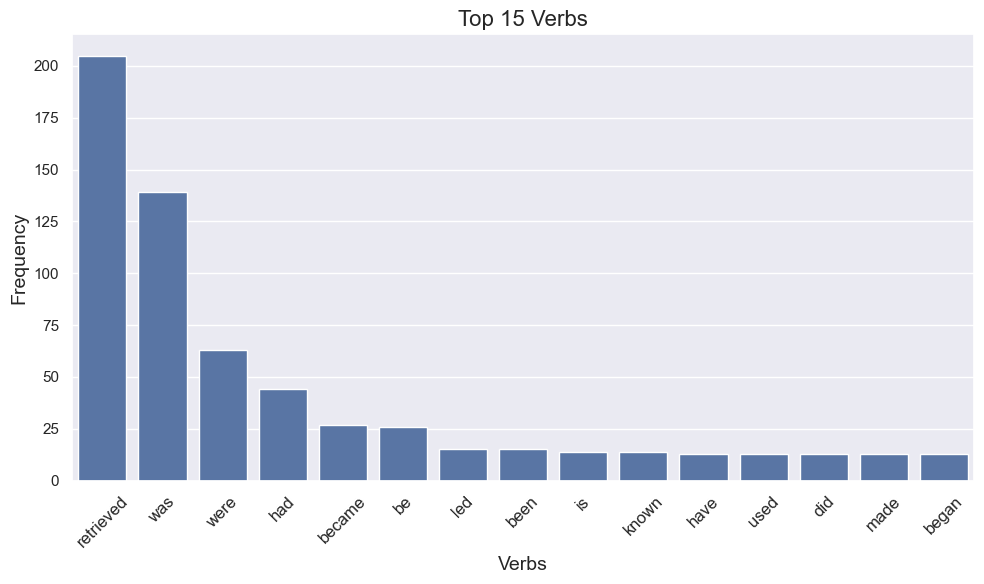

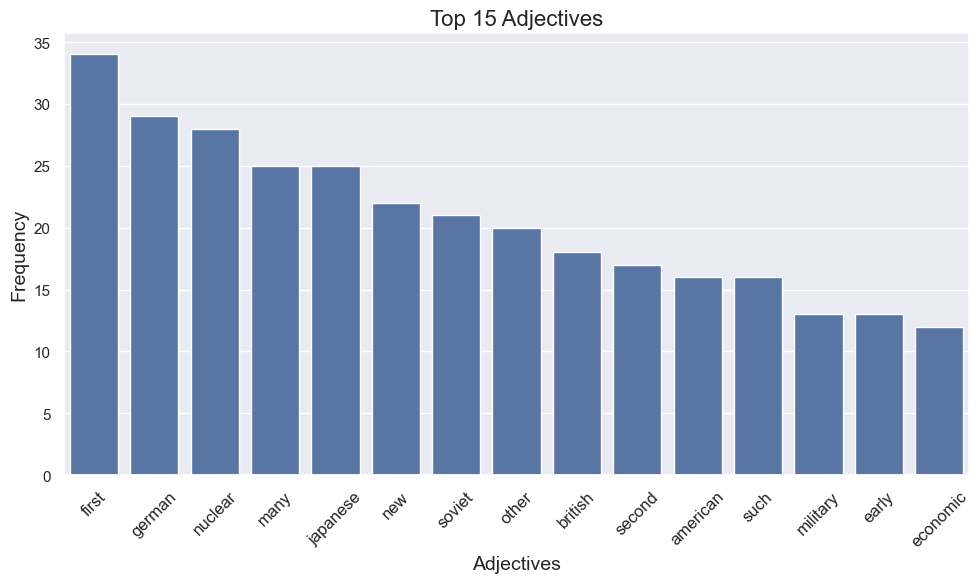

In [159]:
# Function to create and save bar plots
def plot_pos_bar(data, title, xlabel, ylabel, filename):
    words, counts = zip(*data)  # Unpack words and their counts
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(words), y=list(counts))
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()

# Plot and save nouns
plot_pos_bar(noun_counts, "Top 15 Nouns", "Nouns", "Frequency", "top_15_nouns.png")

# Plot and save verbs
plot_pos_bar(verb_counts, "Top 15 Verbs", "Verbs", "Frequency", "top_15_verbs.png")

# Plot and save adjectives
plot_pos_bar(adjective_counts, "Top 15 Adjectives", "Adjectives", "Frequency", "top_15_adjectives.png")
plt.show()
